 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
csv_path_whale = Path("./Resources/whale_returns.csv")
df_whale = pd.read_csv(csv_path_whale, index_col='Date', infer_datetime_format=True, parse_dates=True)

csv_path_algo_returns = Path("./Resources/algo_returns.csv")
df_algo_returns = pd.read_csv(csv_path_algo_returns, index_col='Date', infer_datetime_format=True, parse_dates=True)

csv_path_sp_tsx_history = Path("./Resources/sp_tsx_history.csv")
df_sp_tsx_history = pd.read_csv(csv_path_sp_tsx_history, index_col='Date', infer_datetime_format=True, parse_dates=True)

# pd.read_csv(tsla_data, index_col="date", infer_datetime_format=True, parse_dates=True) 


In [3]:
# Reading whale returns
df_whale.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
df_whale.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
df_whale = df_whale.dropna().copy()
df_whale.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [6]:
# Reading algorithmic returns
df_algo_returns.tail()

,Algo 1,Algo 2
Date,,
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829
2019-04-30,-0.002944,-0.001570
2019-05-01,0.000094,-0.007358


In [7]:
# Count nulls
df_algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
df_algo_returns = df_algo_returns.dropna().copy()
df_algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P TSX 60 Closing Prices
df_sp_tsx_history

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"
...,...
2019-12-20,"$17,118.44"
2019-12-23,"$17,128.71"
2019-12-24,"$17,180.15"


In [10]:
# Check Data Types
df_sp_tsx_history.dtypes

Close    object
dtype: object

In [11]:
df_sp_tsx_history.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [12]:
# Fix Data Types
# df_sp_tsx_history['Close'] = df_sp_tsx_history['Close'].astype(str).astype(int)
# df_sp_tsx_history['Close'] = df_sp_tsx_history(df_sp_tsx_history['Close'], dtype=int)
df_sp_tsx_history['Close'] = df_sp_tsx_history['Close'].str.replace(',', '').str.replace('$', '').astype(float)

C:\Users\Lincoln\AppData\Local\Temp/ipykernel_31128/670452689.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_sp_tsx_history['Close'] = df_sp_tsx_history['Close'].str.replace(',', '').str.replace('$', '').astype(float)


In [13]:
# Calculate Daily Returns
df_sp_tsx_history['Close'] = df_sp_tsx_history['Close'].pct_change()
df_sp_tsx_history.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [14]:
# Drop nulls
df_sp_tsx_history = df_sp_tsx_history.dropna().copy()
df_sp_tsx_history.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [15]:
# Rename `Close` Column to be specific to this portfolio.
df_sp_tsx_history.columns = df_sp_tsx_history.columns.str.replace('Close', 'TSX 60 Close')
df_sp_tsx_history.head()

,TSX 60 Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_data_cols = pd.concat(
    [df_sp_tsx_history, df_whale, df_algo_returns], axis="columns", join="inner"
)
combined_data_cols.tail()

,TSX 60 Close,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
Date,,,,,,,
2019-04-25,-0.000628,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247
2019-04-26,0.002254,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256
2019-04-29,-0.000788,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829
2019-04-30,-0.001183,-0.001295,-0.002211,-0.000259,-0.003702,-0.002944,-0.001570
2019-05-01,-0.004703,-0.005847,-0.001341,-0.007936,-0.007833,0.000094,-0.007358


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

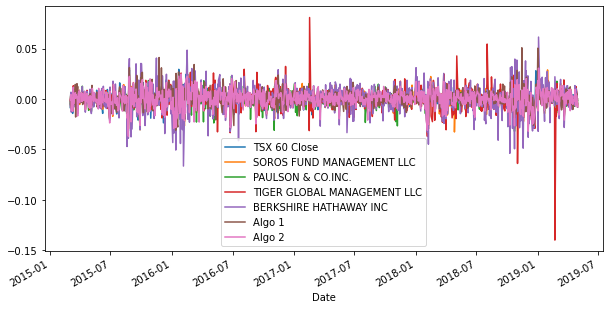

In [17]:
# Plot daily returns of all portfolios
combined_data_cols.plot(figsize=(10,5))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

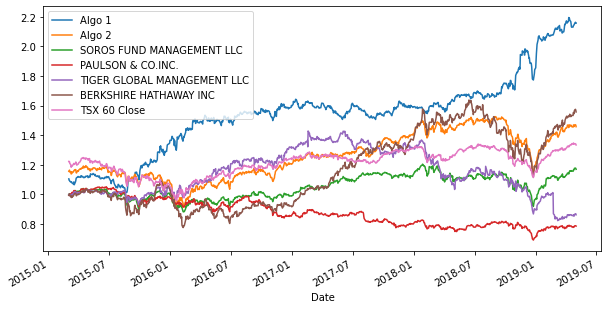

In [18]:
# Calculate cumulative returns of all portfolios
cumulative_returns_algo = (1 + df_algo_returns).cumprod()
cumulative_returns_whale = (1 + df_whale).cumprod()
cumulative_returns_tsx = (1 + df_sp_tsx_history).cumprod()

# Plot cumulative returns

combined_cum_returns = pd.concat(
    [cumulative_returns_algo, cumulative_returns_whale, cumulative_returns_tsx], axis='columns', join = 'inner'
)

combined_cum_returns.plot(figsize=(10,5))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


In [19]:
# Box plot to visually show risk (See below)
daily_std_algo = df_algo_returns.std()
daily_std_tsx = df_sp_tsx_history.std()
daily_std_whale = df_whale.std()
print(daily_std_whale)

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64


### Calculate Standard Deviations

<AxesSubplot:ylabel='Frequency'>

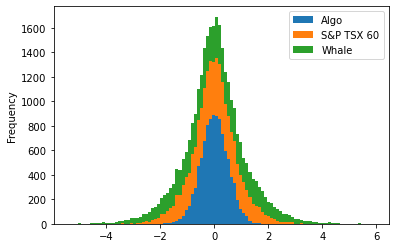

In [20]:
# Calculate the daily standard deviations of all portfolios
daily_std_algo = np.random.normal(scale=0.5, size=10000)
daily_std_tsx = np.random.normal(scale=1.0, size=10000)
daily_std_whale = np.random.normal(scale=1.5, size=10000)

portfolio_std = pd.DataFrame({
    "Algo": daily_std_algo,
    "S&P TSX 60": daily_std_tsx,
    "Whale": daily_std_whale
})

portfolio_std.plot.hist(stacked=True, bins=100)

<AxesSubplot:>

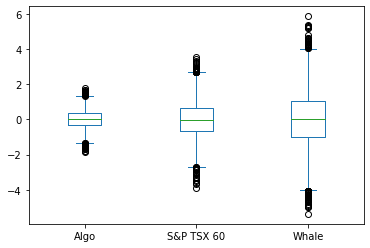

In [21]:
portfolio_std.plot.box()

### Determine which portfolios are riskier than the S&P TSX 60

In [22]:
# Calculate the daily standard deviation of S&P TSX 60

# Determine which portfolios are riskier than the S&P TSX 60

all_summary_statistics = pd.concat(
    [df_algo_returns.describe(), df_sp_tsx_history.describe(), df_whale.describe()], axis='columns', join='inner'
)

all_summary_statistics
# The Consolidated Whale portfolio is riskier than the S&P TSX 60 Portfolio since this has a much higher 
# range of returns and standard deviation. Further analysis via the sharpe ratio calculation will
# have to be done to determine whether this additional risk is compensated in additional returns

,Algo 1,Algo 2,TSX 60 Close,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
count,1235.000000,1235.000000,1817.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,0.000654,0.000341,0.000200,0.000179,-0.000203,-0.000081,0.000501
std,0.007988,0.008466,0.006637,0.007842,0.006977,0.010824,0.012831
min,-0.030951,-0.036937,-0.031241,-0.032711,-0.032099,-0.139820,-0.066505
25%,-0.003252,-0.003733,-0.003156,-0.003594,-0.003961,-0.004746,-0.005515
50%,0.000094,0.000581,0.000653,0.000467,0.000000,0.000232,0.000617
75%,0.003901,0.005194,0.004115,0.004292,0.003567,0.005176,0.007516
max,0.098246,0.083734,0.029389,0.042977,0.029338,0.080705,0.061341


### Calculate the Annualized Standard Deviation

In [23]:
# Calculate the annualized standard deviation (252 trading days)

In [24]:
annualized_std_whale = daily_std_whale * np.sqrt(252)
annualized_std_algo = daily_std_algo * np.sqrt(252)
annualized_std_tsx = daily_std_tsx * np.sqrt(252)

print(annualized_std_tsx, annualized_std_algo, annualized_std_whale)

[ 26.97581175  -7.80921093  -4.98920142 ... -18.57426916   1.98500776
  13.50756383] [ 4.56588566 -1.12959382  2.83215157 ... 18.7265911  16.5097119
  4.64935646] [ 39.06309706 -36.23992967   8.52306424 ... -15.55899337  -3.62242431
 -11.89853756]


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling 21 Standard Deviation'}, xlabel='Date'>

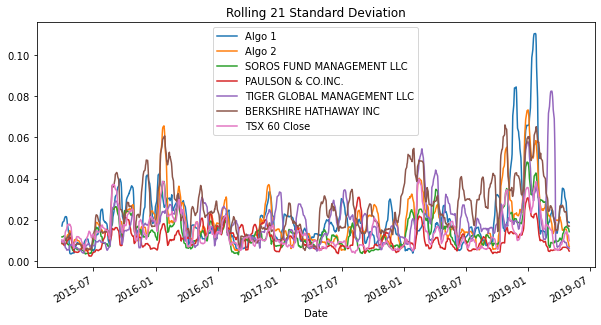

In [25]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
stdev_21_day = combined_cum_returns.rolling(window=21).std()
# Plot the rolling standard deviation
stdev_21_day.plot(figsize=(10,5), title = "Rolling 21 Standard Deviation")

### Calculate and plot the correlation

In [26]:
# Calculate the correlation
correlation_all = combined_cum_returns.corr()
# Display de correlation matrix
correlation_all

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,TSX 60 Close
Algo 1,1.000000,0.595455,0.482645,-0.828120,0.021166,0.589056,0.527928
Algo 2,0.595455,1.000000,0.916664,-0.770396,0.158431,0.945980,0.890936
SOROS FUND MANAGEMENT LLC,0.482645,0.916664,1.000000,-0.658565,0.300951,0.901368,0.843523
PAULSON & CO.INC.,-0.828120,-0.770396,-0.658565,1.000000,-0.178545,-0.782858,-0.611306
TIGER GLOBAL MANAGEMENT LLC,0.021166,0.158431,0.300951,-0.178545,1.000000,0.011178,0.319685
BERKSHIRE HATHAWAY INC,0.589056,0.945980,0.901368,-0.782858,0.011178,1.000000,0.757577
TSX 60 Close,0.527928,0.890936,0.843523,-0.611306,0.319685,0.757577,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:title={'center':'TSX 60 to Algo 1 Beta'}, xlabel='Date'>

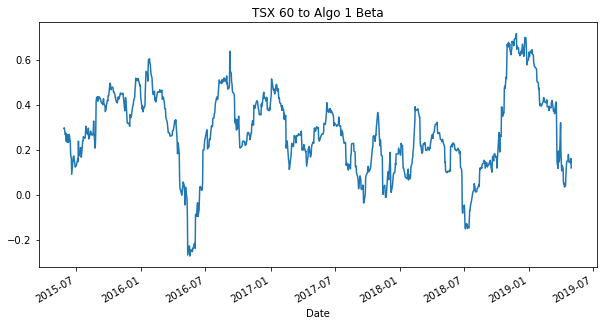

In [27]:
# Calculate covariance of a single portfolio
rolling_cov = combined_data_cols["Algo 1"].rolling(window=60).cov(combined_data_cols["TSX 60 Close"])
# Calculate variance of S&P TSX
rolling_var = combined_data_cols["TSX 60 Close"].rolling(window=60).var()
# Computing beta
rolling_beta = rolling_cov/rolling_var
# Plot beta trend
rolling_beta.plot(figsize=(10,5), title = "TSX 60 to Algo 1 Beta")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'21 Day Exponential Moving Average'}, xlabel='Date'>

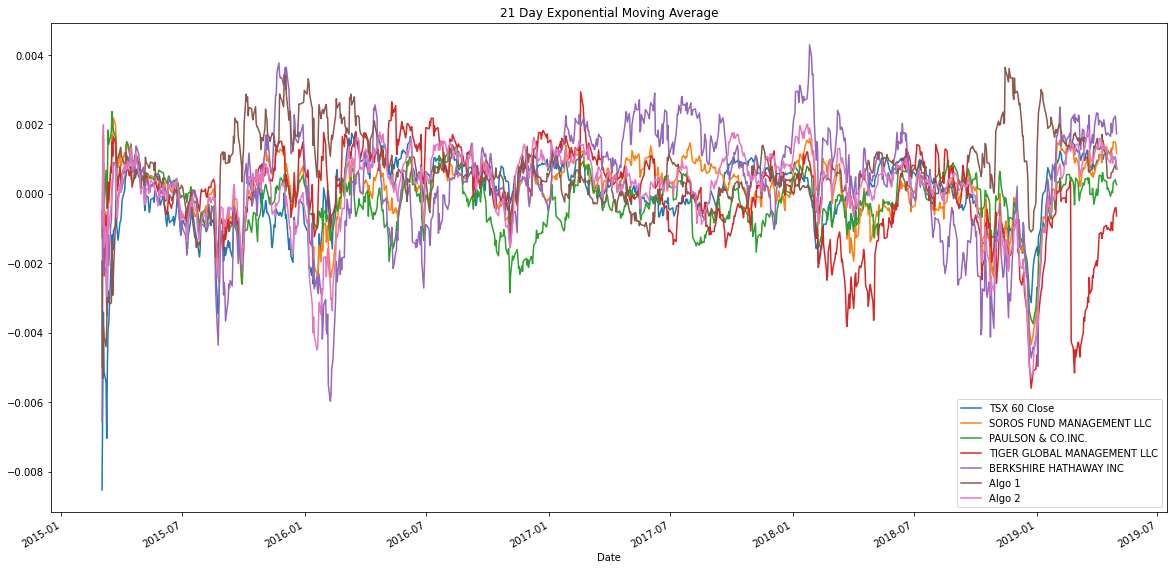

In [28]:
# Use `ewm` to calculate the rolling window
rolling_ewm = combined_data_cols.ewm(halflife=21).mean()
rolling_ewm.plot(figsize=(20,10), title = "21 Day Exponential Moving Average")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [29]:
# Annualized Sharpe Ratios
sharpe_ratios = ((combined_data_cols.mean()) * 252) / (combined_data_cols.std() * np.sqrt(252))
sharpe_ratios

TSX 60 Close                   0.195550
SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

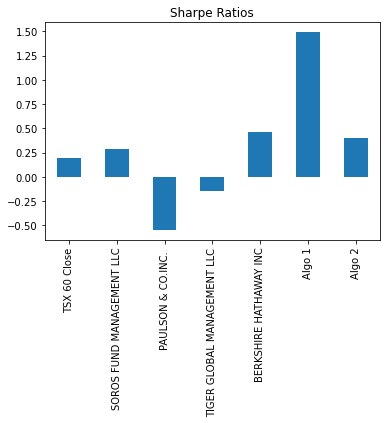

In [30]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

The risk free rate of 0.00% was assumed for measuring the sharpe ratio of all portfolios. As is shown by the sharpe ratio of Algo 1 and Algo 2, both have a greater sharpe ratio than the TSX 60 Close and therefore are considered to have a better risk adjusted return. This can further be interpreted as The algorithmic strategies having a better return for each additional unit of risk after accounting for the risk free rate and standard deviation of each portfolio compared to to the S&P TSX 60.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [31]:
# Reading data from 1st stock
jpm_path = Path("./Resources/jpm_historical.csv")
jpm_df = pd.read_csv(jpm_path)
jpm_df.dropna().copy()
jpm_df.drop(columns=['Open', 'High', 'Low', 'Vol.', 'Change %'], inplace=True)

In [32]:
# Reading data from 2nd stock
gs_path = Path("./Resources/gs_historical.csv")
gs_df = pd.read_csv(gs_path)
gs_df.dropna().copy()
gs_df.drop(columns=['Date', 'Open', 'High', 'Low', 'Vol.', 'Change %'], inplace=True)

In [33]:
# Reading data from 3rd stock
amd_path = Path("./Resources/amd_historical.csv")
amd_df = pd.read_csv(amd_path)
amd_df.dropna().copy()
amd_df.drop(columns=['Date', 'Open', 'High', 'Low', 'Vol.', 'Change %'], inplace=True)

In [34]:
# Combine all stocks in a single DataFrame
stocks_combined = pd.concat(
    [jpm_df, gs_df, amd_df], axis='columns', join='inner'
)

stocks_combined

,Date,Price,Price,Price
0,"Apr 25, 2019",113.61,181.26,27.66
1,"Apr 24, 2019",113.55,180.46,28.46
2,"Apr 23, 2019",113.74,182.20,27.97
3,"Apr 22, 2019",113.60,183.16,28.18
4,"Apr 18, 2019",113.46,181.84,27.68
...,...,...,...,...
247,"May 01, 2018",108.78,197.53,11.13
248,"Apr 30, 2018",108.78,199.26,10.88
249,"Apr 27, 2018",109.40,198.74,11.11
250,"Apr 26, 2018",110.10,198.72,11.04


In [35]:
stocks_combined.columns=['Date', 'JPM', 'GS', 'AMD']
stocks_combined.head()

,Date,JPM,GS,AMD
0,"Apr 25, 2019",113.61,181.26,27.66
1,"Apr 24, 2019",113.55,180.46,28.46
2,"Apr 23, 2019",113.74,182.20,27.97
3,"Apr 22, 2019",113.60,183.16,28.18
4,"Apr 18, 2019",113.46,181.84,27.68


In [36]:
# Reset Date index
stocks_combined = stocks_combined.set_index(pd.to_datetime(jpm_df['Date'], infer_datetime_format=True))
stocks_combined.drop(stocks_combined.columns[[0]], axis=1, inplace=True)
stocks_combined.head()

,JPM,GS,AMD
Date,,,
2019-04-25,113.61,181.26,27.66
2019-04-24,113.55,180.46,28.46
2019-04-23,113.74,182.20,27.97
2019-04-22,113.60,183.16,28.18
2019-04-18,113.46,181.84,27.68


In [37]:
# Reorganize portfolio data by having a column per symbol

In [38]:
# Calculate daily returns
jpm_return =  stocks_combined['JPM'].pct_change().dropna()
gs_return =  stocks_combined['GS'].pct_change().dropna()
amd_return =  stocks_combined['AMD'].pct_change().dropna()
# Drop NAs

# Display sample data
combined_returns = pd.concat(
    [jpm_return, gs_return, amd_return], axis='columns', join='inner'
)
combined_returns

,JPM,GS,AMD
Date,,,
2019-04-24,-0.000528,-0.004414,0.028923
2019-04-23,0.001673,0.009642,-0.017217
2019-04-22,-0.001231,0.005269,0.007508
2019-04-18,-0.001232,-0.007207,-0.017743
2019-04-17,0.007403,-0.019138,-0.006864
...,...,...,...
2018-05-01,0.007969,0.032675,0.014585
2018-04-30,0.000000,0.008758,-0.022462
2018-04-27,0.005700,-0.002610,0.021140


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [39]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = combined_returns.dot(weights)

# Display sample data
portfolio_returns.head()

Date
2019-04-24    0.007994
2019-04-23   -0.001967
2019-04-22    0.003849
2019-04-18   -0.008727
2019-04-17   -0.006199
dtype: float64

In [40]:
df_portfolio_returns = pd.DataFrame(portfolio_returns)
#df_portfolio_returns = df_portfolio_returns.set_index('Date')
#df_portfolio_returns = df_portfolio_returns.set_index(df_portfolio_returns['Date'], inplace=True)
#df_portfolio_returns.columns = ['My Portfolio']
df_portfolio_returns.columns = ['My Portfolio']
df_portfolio_returns.head()

,My Portfolio
Date,
2019-04-24,0.007994
2019-04-23,-0.001967
2019-04-22,0.003849
2019-04-18,-0.008727
2019-04-17,-0.006199


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [41]:
# Join your returns DataFrame to the original returns DataFrame

all_returns = pd.concat(
    [df_portfolio_returns, combined_data_cols], axis='columns', join='inner'
)
#all_returns = all_returns.set_index(pd.to_datetime(jpm_df['Date'], infer_datetime_format=True))
all_returns.dropna().copy()

,My Portfolio,TSX 60 Close,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
Date,,,,,,,,
2019-04-24,7.993653e-03,-0.004972,0.002284,0.001009,-0.004000,-0.006386,0.001095,0.000399
2019-04-23,-1.967283e-03,0.005557,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622
2019-04-22,3.848701e-03,-0.002139,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936
2019-04-18,-8.727429e-03,0.004145,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229
2019-04-17,-6.199458e-03,0.002548,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228
...,...,...,...,...,...,...,...,...
2018-05-01,1.840957e-02,0.000708,0.008046,0.001157,-0.006231,0.005326,0.001589,0.002106
2018-04-30,-4.567884e-03,-0.003896,0.004538,-0.011806,-0.015002,-0.001435,-0.002609,-0.008726
2018-04-27,8.076542e-03,0.002004,-0.032711,0.000142,0.001663,-0.005245,-0.002001,-0.000782


In [42]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_returns.head()

,My Portfolio,TSX 60 Close,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
Date,,,,,,,,
2019-04-24,0.007994,-0.004972,0.002284,0.001009,-0.004000,-0.006386,0.001095,0.000399
2019-04-23,-0.001967,0.005557,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622
2019-04-22,0.003849,-0.002139,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936
2019-04-18,-0.008727,0.004145,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229
2019-04-17,-0.006199,0.002548,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [43]:
# Calculate the annualized `std`
portfolio_std = df_portfolio_returns.std()
portfolio_ann_std = daily_std_whale * np.sqrt(252)
portfolio_ann_std

array([ 39.06309706, -36.23992967,   8.52306424, ..., -15.55899337,
        -3.62242431, -11.89853756])

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21 Day Rolling Std'}, xlabel='Date'>

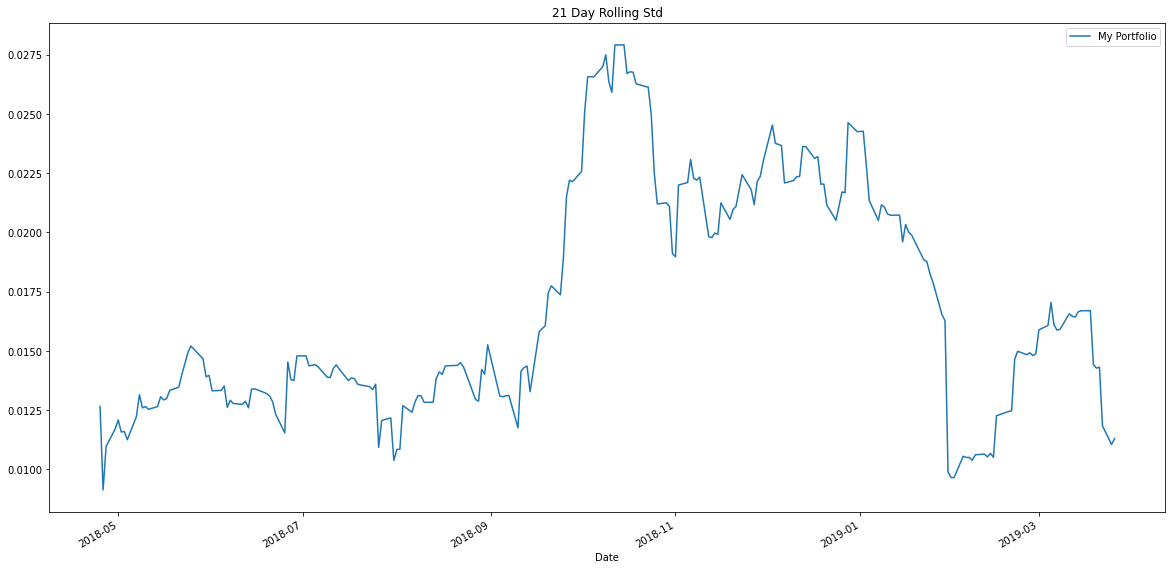

In [44]:
# Calculate rolling standard deviation
rolling_portfolio_std = df_portfolio_returns.rolling(window=21).std()
# Plot rolling standard deviation
rolling_portfolio_std.plot(figsize=(20,10), title = "21 Day Rolling Std")

### Calculate and plot the correlation

In [45]:
# Calculate and plot the correlation
correlation = all_returns.corr()
#myportfolio_corr[myportfolio_corr == myportfolio_corr[myportfolio_corr<1].max()]
correlation

,My Portfolio,TSX 60 Close,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
My Portfolio,1.000000,-0.208804,-0.166543,-0.132607,-0.104636,-0.164336,-0.057910,-0.195658
TSX 60 Close,-0.208804,1.000000,0.670560,0.575381,0.392030,0.647955,0.285225,0.746258
SOROS FUND MANAGEMENT LLC,-0.166543,0.670560,1.000000,0.743208,0.460517,0.780304,0.296113,0.822777
PAULSON & CO.INC.,-0.132607,0.575381,0.743208,1.000000,0.480205,0.614022,0.320835,0.762194
TIGER GLOBAL MANAGEMENT LLC,-0.104636,0.392030,0.460517,0.480205,1.000000,0.312599,0.095936,0.400954
BERKSHIRE HATHAWAY INC,-0.164336,0.647955,0.780304,0.614022,0.312599,1.000000,0.297536,0.767216
Algo 1,-0.057910,0.285225,0.296113,0.320835,0.095936,0.297536,1.000000,0.336917
Algo 2,-0.195658,0.746258,0.822777,0.762194,0.400954,0.767216,0.336917,1.000000


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'TSX 60 to My Portfolio Beta'}, xlabel='Date'>

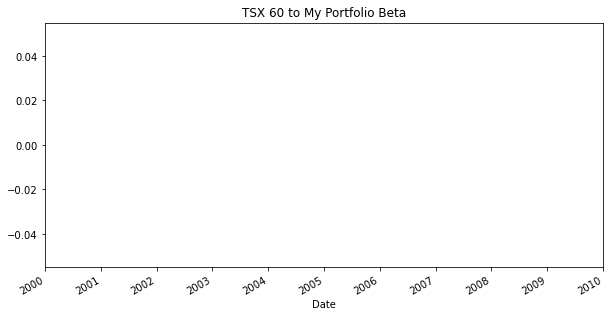

In [46]:
# Calculate and plot Beta
my_rolling_cov = df_portfolio_returns["My Portfolio"].rolling(window=60).cov(all_returns["TSX 60 Close"])

my_rolling_var = all_returns["TSX 60 Close"].rolling(window=60).var()

my_rolling_beta = my_rolling_cov/my_rolling_var

my_rolling_beta.plot(figsize=(10,5), title = "TSX 60 to My Portfolio Beta")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [52]:
# Calculate Annualized Sharpe Ratios
my_portfolio_sharpe = ((all_returns.mean()) * 252) / (all_returns.std() * np.sqrt(252))
my_portfolio_sharpe

My Portfolio                  -0.915696
TSX 60 Close                   0.670395
SOROS FUND MANAGEMENT LLC      0.048277
PAULSON & CO.INC.             -0.163570
TIGER GLOBAL MANAGEMENT LLC   -0.909170
BERKSHIRE HATHAWAY INC        -0.084551
Algo 1                         2.052528
Algo 2                        -0.023342
dtype: float64

<AxesSubplot:title={'center':'My Portfolio Sharpe Ratio'}>

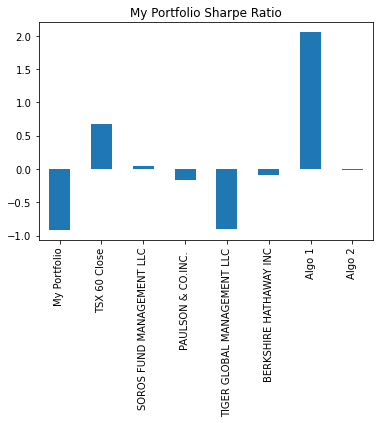

In [53]:
# Visualize the sharpe ratios as a bar plot
my_portfolio_sharpe.plot(kind="bar", title="My Portfolio Sharpe Ratio")

### How does your portfolio do?

Write your answer here!

Compared to other portfolios My Portfolio has a negative sharpe ratio meaning each unit of risk is not adequately rewarded with an additional unit of reward and it is better off investing in the risk-free rate over this portfolio. Furthermore, the portfolios return is expected to be negative due to this result, which holds true in this instance, since JPM, GS and AMD shares underperformed the broader market during 25/04/2018 to 25/04/2019 as per the sample dates selected.